Juan Pablo Meza

CIS 2532

This program incorporates Intuitive Deep Learning in Neural Networks. We process and analyze the data using Keras and Tensorflow.

In [1]:
#importing necessary libraries and repositories
import numpy as np
import tensorflow
import keras
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from skimage.transform import resize

In [2]:
#importing the data into the train and test variables
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
#printing the shape of the x_train variable
print('X_train shape')
x_train.shape

X_train shape


(50000, 32, 32, 3)

In [4]:
#printing the shape of the y_train variable
print('Y_train shape')
y_train.shape

Y_train shape


(50000, 1)

Taking a look at an individual image from the 'cifar10' dataset using 'x_train[0]'

Pulling the image from the x_train variable with index of '0'

In [5]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

Displaying the actual image that was just pulled using the matplotlib library

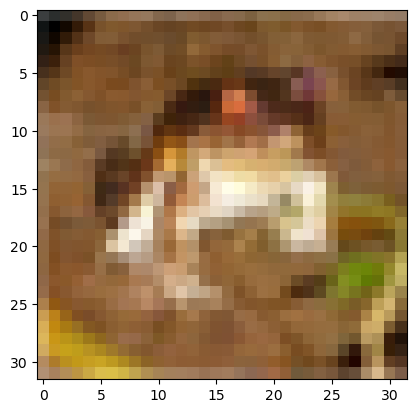

In [6]:
img = plt.imshow(x_train[0])

In [7]:
print(f'The label is: {y_train[0]}')

The label is: [6]


Displaying one more image now, but instead of the index of '0' it will be index of '1' within the 'x_train' variable

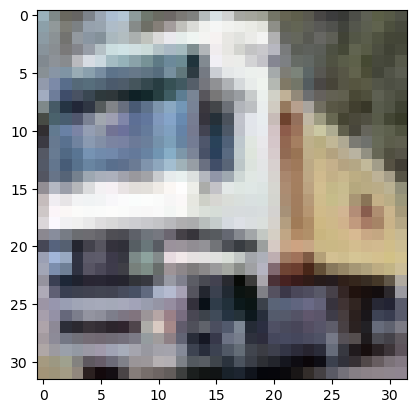

In [8]:
img = plt.imshow(x_train[1])

In [9]:
print(f'The label is: {y_train[1]}')

The label is: [9]


We now convert the label into a set of 10 numbers where each number represents if the image belongs to that class or not. Since we have 10 output neurons in our neural network, our labels must match this as well. To convert our labels to our one-hot encoding, we use a function in Keras:

One-Hot Encoding: In digital circuits and machine learning, a one-hot is a group of bits among which the legal combinations of values are only those with a single high bit and all the others low. A similar implementation in which all bits are '1' except one '0' is sometimes called one-cold.

In [10]:
#creating the one-hot encoding for 'y_test' and y_train'
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [11]:
print(f'The one hot label is: {y_train_one_hot[1]}')

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [12]:
#A common step allow the values be between 0-1. This will aid the training of the neural network.
#Since the pixel values are already known, we divide them by 255
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [13]:
#displaying the x_train training within the network with the index of '0'
x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

# Building and Training our Convolutional Neural Network

In [14]:
#creating an empty sequential layer. We will use this to model and add to it later on
model = Sequential()

Coding the first layer of the network

In [15]:
model.add(Conv2D(32, (3, 3), activation= 'relu', padding= 'same', input_shape=(32,32,3)))

Coding the second layer of the network

In [16]:
model.add(Conv2D(32, (3, 3), activation= 'relu', padding= 'same'))

Max Pooling the layers with a 2x2 size

Max Pooling: Max Pooling is a convolution process where the Kernel extracts the maximum value of the area it convolves.

In [17]:
model.add(MaxPooling2D(pool_size=(2, 2)))

Adding a droput layer with a probability of .25 to prevent it from overfitting

In [18]:
model.add(Dropout(0.25))

Adding anothe 4 layers. They will be the same as the first 4 but with a conv layer of 64 rather than 32

In [19]:
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

Coding and connecting our layers. This time, the neurons are spatially arranged. we also flatten the layers since they are going to be arranged in a cubical format

In [20]:
model.add(Flatten())

Coding a dense layer with 512 neurons with relu activation

ReLU activation: The Rectified Linear Unit is the most commonly used activation function in deep learning models.

In [21]:
model.add(Dense(512, activation = 'relu'))

Adding a dropout probability with the rate of .5

In [22]:
model.add(Dropout(.5))

Coding another dense layer, now with 10 neurons rather than 512 and with softmax activation.

In [23]:
model.add(Dense(10, activation='softmax'))

Seeing the actual structure of the model

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

We now use the loss function in order to classify various problems. We classify them using the 'categorical_crossentropy'.

The optimizer is going the 'Adam' which is a type of stochastic gradient descent which helps train the network better.

We will also track the accuracy of the model

Categorical Crossentropy: It gives us a measure of how well the network is learning the data

Stochastic Gradient Descent: Stochastic gradient descent is the most efficient algorithm discovered for training artificial neural networks

In [25]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
#Time to run the training
hist = model.fit(x_train, y_train_one_hot, batch_size=32, epochs=20, validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 7s 4ms/step - loss: 1.5691 - accuracy: 0.4268 - val_loss: 1.1855 - val_accuracy: 0.5836
Epoch 2/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1659 - accuracy: 0.5845 - val_loss: 0.9686 - val_accuracy: 0.6574
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0090 - accuracy: 0.6434 - val_loss: 0.9132 - val_accuracy: 0.6823
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8968 - accuracy: 0.6823 - val_loss: 0.8245 - val_accuracy: 0.7147
Epoch 5/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8268 - accuracy: 0.7098 - val_loss: 0.8204 - val_accuracy: 0.7165
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.7674 - accuracy: 0.7327 - val_loss: 0.7632 - val_accuracy: 0.7344
Epoch 7/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.7218 - accuracy: 0.7442 - val_loss: 0.7383 - val_accuracy:

# Visualizing the model training and the validation loss using matplotlib

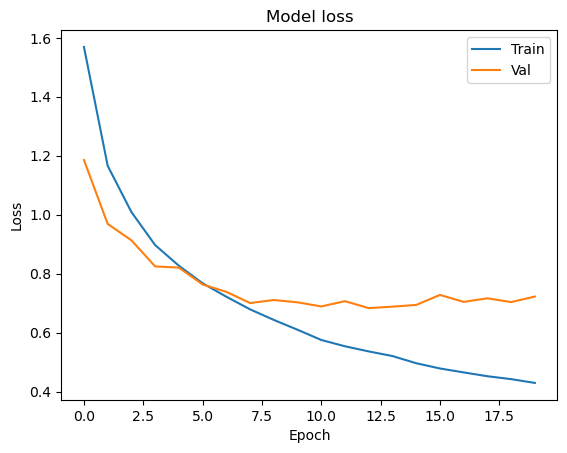

In [27]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

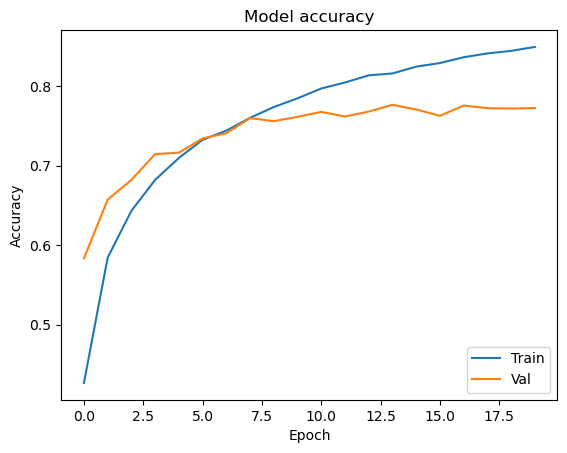

In [28]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Tweakin the hyperparameters and run it on our test dataset

In [29]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 1s 2ms/step - loss: 0.7265 - accuracy: 0.7722


0.7721999883651733

Saving the trained model.

We will save in a HDF5 format (extension '.h5')

HDF5 format: The Hierarchical Data Format version 5 (HDF5), is an open source file format that supports large, complex, heterogeneous data.

In [30]:
model.save('cifar10_model.h5')

# Testing out with some of my images

In [31]:
image = plt.imread('cat.jpg')

Resizing the image of the cat in order to fit it into the model

In [32]:
image_resize = resize(image, (32, 32, 3))

Displaying my image that was just imported

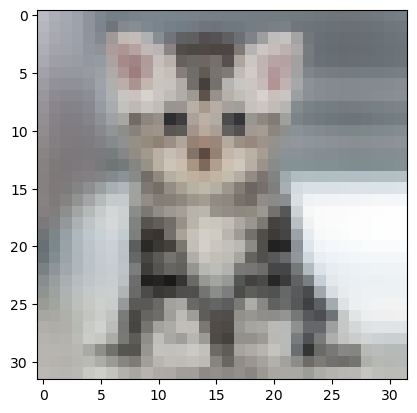

In [33]:
img = plt.imshow(image_resize)

Coding the probabilites of the model based on the new image

In [34]:
probs = model.predict(np.array([image_resize,]))

1/1 [==============================] - 0s 120ms/step


In [35]:
#Displaying the probabilities
probs

array([[1.0333713e-04, 1.5029677e-07, 3.9418279e-03, 3.1020021e-02,
        9.5709398e-02, 7.2917640e-01, 8.3888313e-05, 1.3995644e-01,
        7.5685616e-06, 1.0305466e-06]], dtype=float32)

In [36]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probs[0,:])

In [37]:
print(f'Most likely class: {number_to_class[index[9]]} -- Probability: {probs[0,[index[9]]]}')
print(f'Second Most likely class: {number_to_class[index[8]]} -- Probability: {probs[0,[index[8]]]}')
print(f'Third Most likely class: {number_to_class[index[7]]} -- Probability: {probs[0,[index[7]]]}')
print(f'Fourth Most likely class: {number_to_class[index[6]]} -- Probability: {probs[0,[index[6]]]}')
print(f'Fifth Most likely class: {number_to_class[index[5]]} -- Probability: {probs[0,[index[5]]]}')

Most likely class: dog -- Probability: [0.7291764]
Second Most likely class: horse -- Probability: [0.13995644]
Third Most likely class: deer -- Probability: [0.0957094]
Fourth Most likely class: cat -- Probability: [0.03102002]
Fifth Most likely class: bird -- Probability: [0.00394183]


Overall, this neural model has accurately predicted that the image above is a cat.

Credits to Author:

Joseph Lee

Github Repository:

https://github.com/josephlee94/intuitive-deep-learning/tree/master/Part%202:%20Image%20Recognition%20CIFAR-10